In [12]:
#importing library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

In [13]:
#loading the dataset
df=pd.read_csv('/kaggle/input/divorce-prediction/divorce_data.csv',delimiter=';')
#loading the dataset
df

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q46,Q47,Q48,Q49,Q50,Q51,Q52,Q53,Q54,Divorce
0,2,2,4,1,0,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,...,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,...,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,...,2,1,2,3,2,2,2,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,0,0,0,0,0,0,0,0,0,0,...,1,0,4,1,1,4,2,2,2,0
166,0,0,0,0,0,0,0,0,0,0,...,4,1,2,2,2,2,3,2,2,0
167,1,1,0,0,0,0,0,0,0,1,...,3,0,2,0,1,1,3,0,0,0
168,0,0,0,0,0,0,0,0,0,0,...,3,3,2,2,3,2,4,3,1,0


In [14]:
df['Divorce'].value_counts()

Divorce
0    86
1    84
Name: count, dtype: int64

In [15]:
#Checking for missing values 
df.isna().sum()

Q1         0
Q2         0
Q3         0
Q4         0
Q5         0
Q6         0
Q7         0
Q8         0
Q9         0
Q10        0
Q11        0
Q12        0
Q13        0
Q14        0
Q15        0
Q16        0
Q17        0
Q18        0
Q19        0
Q20        0
Q21        0
Q22        0
Q23        0
Q24        0
Q25        0
Q26        0
Q27        0
Q28        0
Q29        0
Q30        0
Q31        0
Q32        0
Q33        0
Q34        0
Q35        0
Q36        0
Q37        0
Q38        0
Q39        0
Q40        0
Q41        0
Q42        0
Q43        0
Q44        0
Q45        0
Q46        0
Q47        0
Q48        0
Q49        0
Q50        0
Q51        0
Q52        0
Q53        0
Q54        0
Divorce    0
dtype: int64

# Training the model

In [16]:
y=df['Divorce'].copy()
x=df.drop('Divorce',axis=1)

x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=123,shuffle=True)


In [17]:
x_train

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q45,Q46,Q47,Q48,Q49,Q50,Q51,Q52,Q53,Q54
29,4,3,3,2,4,1,0,3,3,2,...,4,4,4,4,4,4,4,4,4,4
35,3,3,3,3,3,1,1,3,3,3,...,4,4,4,4,4,4,4,4,4,4
0,2,2,4,1,0,0,0,0,0,0,...,3,2,1,3,3,3,2,3,2,1
85,0,0,0,0,0,0,0,0,0,0,...,2,3,1,0,0,1,1,0,0,0
62,3,2,3,2,3,2,1,2,3,2,...,4,4,4,4,4,4,4,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17,4,4,4,3,4,0,0,4,4,3,...,4,3,4,3,4,4,3,4,3,4
98,0,0,0,0,0,2,1,0,0,0,...,1,4,2,3,0,0,0,2,4,1
66,3,3,2,3,3,1,1,3,2,3,...,4,3,4,3,4,4,3,4,3,4
126,0,0,0,0,0,0,0,0,0,0,...,4,0,0,0,1,1,2,1,0,2


In [18]:
y_train

29     1
35     1
0      1
85     0
62     1
      ..
17     1
98     0
66     1
126    0
109    0
Name: Divorce, Length: 118, dtype: int64

In [19]:
model=LogisticRegression()

model.fit(x_train,y_train)

model.score(x_test,y_test)*100

98.07692307692307

In [30]:
n_components=10
pca=PCA(n_components=n_components)
pca.fit(x_train)
x_train_reduced=pd.DataFrame(pca.transform(x_train),columns=['PC'+str(i) for i in range(1,n_components+1)],index=x_train.index)
x_test_reduced=pd.DataFrame(pca.transform(x_test),columns=['PC'+str(i) for i in range(1,n_components+1)],index=x_test.index)
x_train_reduced

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
29,11.700092,-2.013636,0.348320,0.058004,0.918486,-0.250086,2.153766,0.837374,-0.230913,-0.462182
35,11.043145,-1.487656,0.504556,0.021198,-0.020441,0.175553,-1.247360,0.195467,-0.162668,0.123524
0,-5.791347,0.284155,2.385685,0.210250,2.253153,1.195588,-1.284634,1.127853,0.352495,-1.486367
85,-12.395915,-0.106225,-1.446214,0.783840,-0.713163,-1.461347,-0.214950,-0.754646,-0.130048,-0.016590
62,9.153500,-3.084683,1.793430,1.410657,1.087068,0.583541,0.169501,0.026926,0.078888,0.482465
...,...,...,...,...,...,...,...,...,...,...
17,12.861485,1.057268,-2.390448,-2.097782,-0.401760,-0.749141,1.473002,-0.054908,0.815318,-0.576382
98,-11.320703,-1.055035,0.865325,-0.190042,-2.151866,1.357515,0.775547,-0.514447,-2.205439,3.227035
66,8.957784,-0.812690,-0.241266,-0.673168,-0.493204,-0.533566,-0.329139,-0.663085,1.385506,-0.250494
126,-9.477617,-1.362566,-0.048301,2.431965,-0.733333,-0.749280,-0.693184,-0.729360,3.582735,-2.635307


In [28]:
x_train_reduced.var()

PC1     99.046961
PC2      4.625679
PC3      3.529708
PC4      2.002776
PC5      1.834414
PC6      1.712999
PC7      1.395217
PC8      1.274575
PC9      1.169181
PC10     1.108270
dtype: float64

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


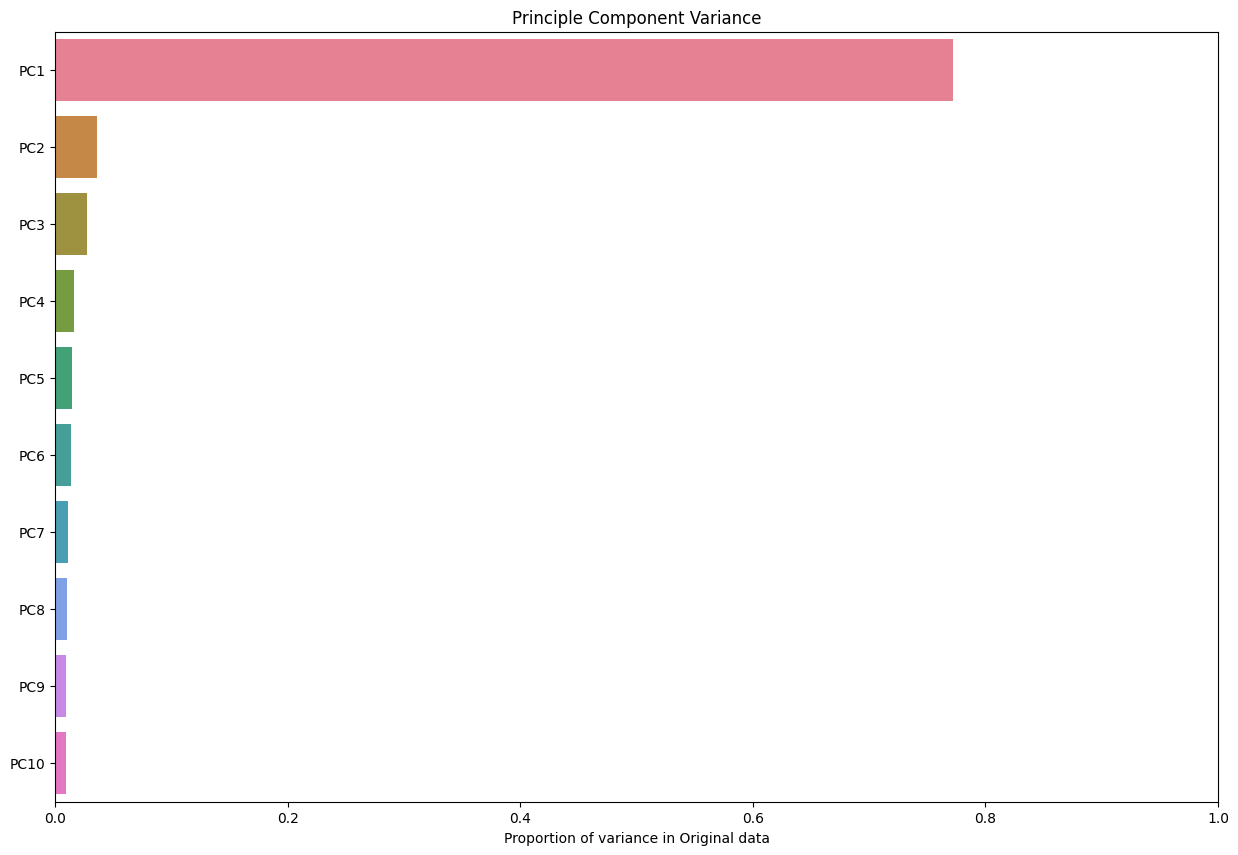

In [29]:
plt.figure(figsize=(15,10))
sns.barplot(x=pca.explained_variance_ratio_,y=['PC'+str(i) for i in range(1,n_components+1)],orient='h',palette='husl')
plt.xlim(0.,1.)
plt.xlabel('Proportion of variance in Original data')
plt.title('Principle Component Variance')
plt.show()

In [37]:
reduced_model=LogisticRegression()
reduced_model.fit(x_train_reduced,y_train)
print(reduced_model.score(x_test_reduced,y_test))

0.9807692307692307


# Using PCA for visualization

In [38]:
n_components=2
pca=PCA(n_components=n_components)
pca.fit(x_train)
x_train_reduced=pd.DataFrame(pca.transform(x_train),columns=['PC'+str(i) for i in range(1,n_components+1)],index=x_train.index)

In [39]:
x_train_reduced

,PC1,PC2
29,11.700092,-2.013636
35,11.043145,-1.487656
0,-5.791347,0.284155
85,-12.395915,-0.106225
62,9.153500,-3.084683
...,...,...
17,12.861485,1.057268
98,-11.320703,-1.055035
66,8.957784,-0.812690
126,-9.477617,-1.362566


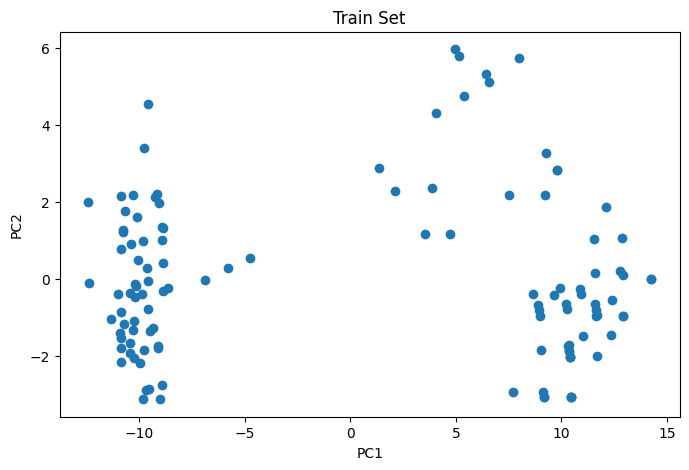

In [43]:
plt.figure(figsize=(8,5))
plt.scatter(x_train_reduced['PC1'],x_train_reduced['PC2'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Train Set')
plt.show()